## Compute Camera Calibration

In [1]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt

import ipywidgets as wg
from IPython.display import display

from ipywidgets import interact, interactive, fixed

import pickle as pkl


from PIL import Image as Image

%matplotlib qt

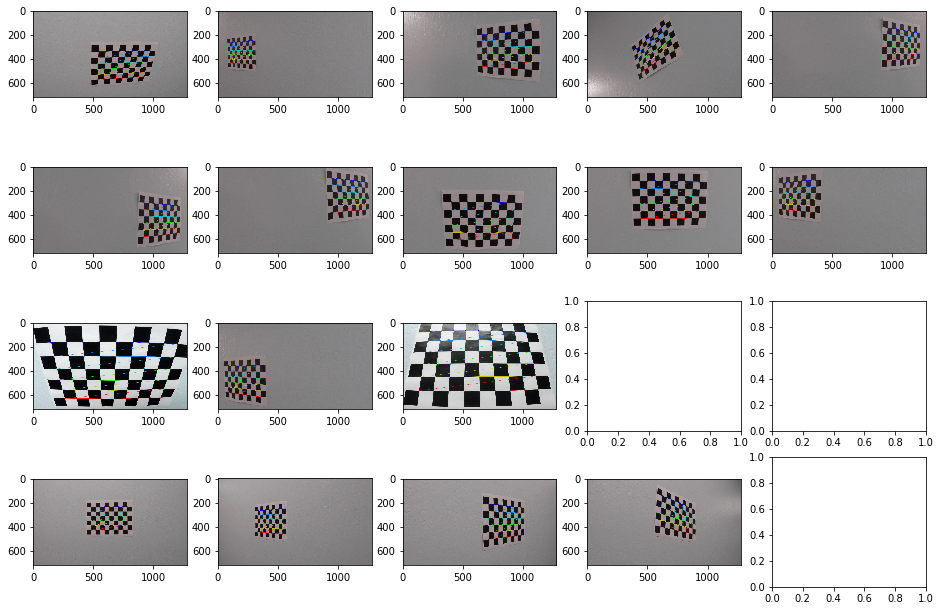

In [2]:


fig, axs = plt.subplots(4,5, figsize=(16, 11))
axs=axs.ravel()
 
# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*9,3), np.float32)
objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.

# Make a list of calibration images
images = glob.glob('./camera_cal/calibration*.jpg')

# Step through the list and search for chessboard corners
cnt=0
for fname in images:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (9,6),None)

    # If found, add object points, image points
    
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)

        # Draw and display the corners
        img = cv2.drawChessboardCorners(img, (9,6), corners, ret)
        #cv2.imshow('img',img)
        #cv2.waitKey(500)
        #img = cv2.cvtColor(img, cv2.cv.CV_BGR2RGB)
        #plt.imshow(img)
        #plt.show()
        axs[cnt-1].imshow(img)
        image = Image.fromarray(img)
        image.save('./output_images/calibration-image'+ str(cnt)+'.jpg')
    cnt+=1


#cv2.destroyAllWindows()

In [3]:
# performs the camera calibration, image distortion correction and 
# returns the undistorted image
def cal_undistort(img, objpoints, imgpoints):
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1],None,None)
    undist = cv2.undistort(img, mtx, dist, None, mtx) 
    return undist, mtx, dist




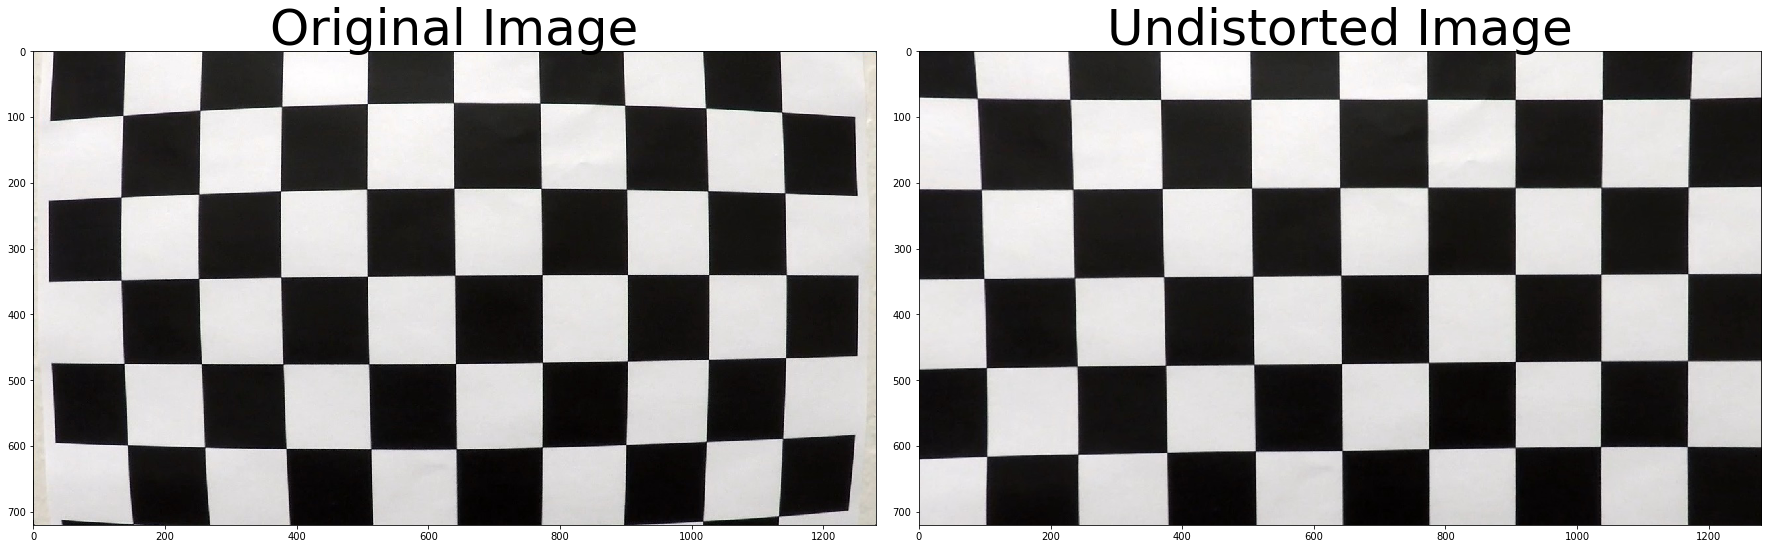

In [8]:
# Read in an image
img = cv2.imread('./camera_cal/calibration1.jpg')



undistorted, mtx, dist = cal_undistort(img, objpoints, imgpoints)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(cv2.cvtColor(undistorted, cv2.COLOR_BGR2RGB))
ax2.set_title('Undistorted Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)




image = Image.fromarray(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
image.save('./output_images/undistor-original_board.jpg')


image = Image.fromarray(cv2.cvtColor(undistorted, cv2.COLOR_BGR2RGB))
image.save('./output_images/undistor-corrected_board.jpg')


#TODO Save camera callibration parameters to pickle file

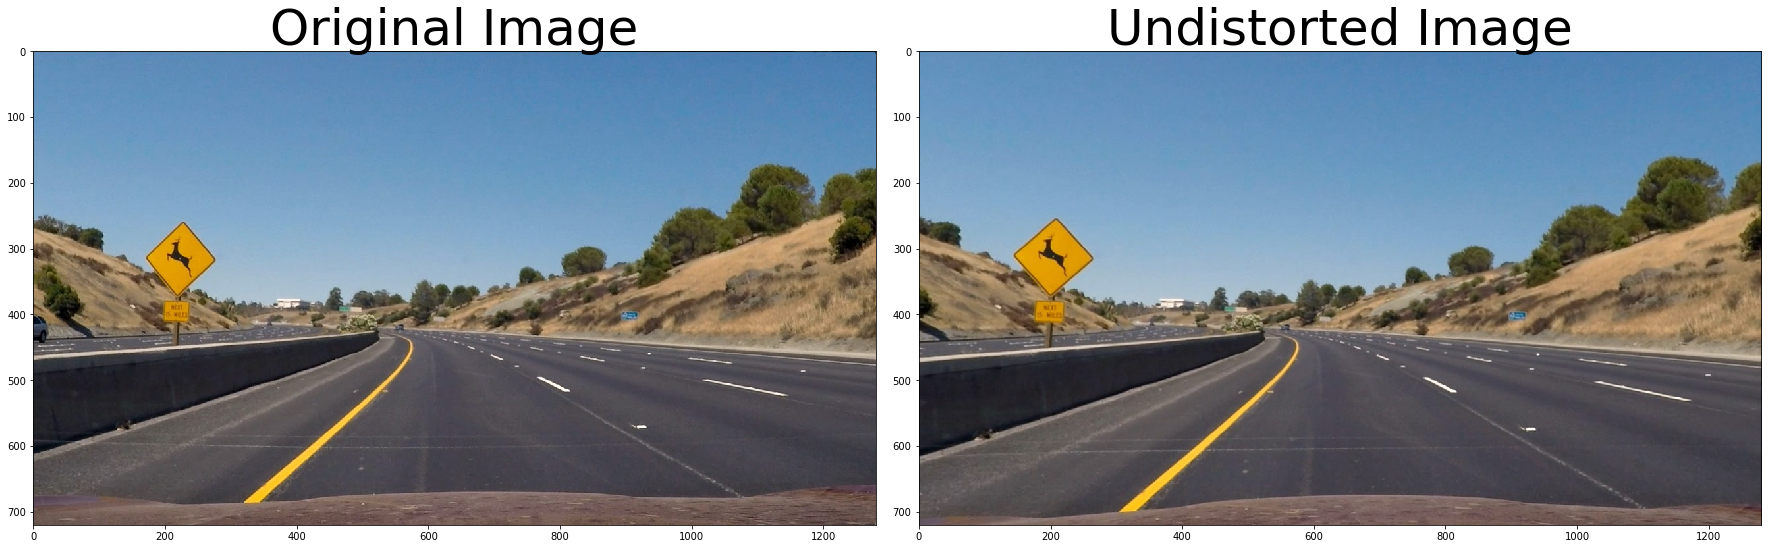

In [9]:
# Read in an image
img = cv2.imread('./test_images/test2.jpg')



undistorted, mtx, dist = cal_undistort(img, objpoints, imgpoints)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(cv2.cvtColor(undistorted, cv2.COLOR_BGR2RGB))
ax2.set_title('Undistorted Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)


image = Image.fromarray(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
image.save('./output_images/undistor-original_sample_image.jpg')


image = Image.fromarray(cv2.cvtColor(undistorted, cv2.COLOR_BGR2RGB))
image.save('./output_images/undistor-corrected_sample_image.jpg')

#TODO Save camera callibration parameters to pickle file

In [6]:
pkl.dump( { 'objpoints': objpoints, 'imgpoints': imgpoints, 'mtx' : mtx, 'dist' : dist }, open('./pickle_data_store/camera_calibration.p', 'wb'))